In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [9]:
df_train = pd.read_csv('../input/train_data/train_data.csv', sep=',')
df_test = pd.read_csv('../input/test_data/test_data.csv', sep=',')

In [10]:
col = ['op_setting_1', 'op_setting_2',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17',
       'sensor_18', 'sensor_20', 'sensor_21']
mean = df_train.mean()
std = df_train.std()

def preprocess(df, norm=True, rul=False):
    X = pd.DataFrame()
    X['engine_no'] = df['engine_no']
    X['time_in_cycles'] = df['time_in_cycles']
    if norm:
        for c in col:
            X[c] = (df[c] - mean[c])/std[c]
    else:
        for c in col:
            X[c] = df[c]
    if 'RUL' in df.columns:
        if rul:
            X['RUL'] = df['RUL']
        y = (df['RUL']<100).astype(int)
    else:
        y=None
    return X, y

In [33]:
X, y = preprocess(df_train, rul=True, norm=True)

In [34]:
eng_un = X['engine_no'].unique()
series = {}
for i in eng_un:
    series[i] = X[X['engine_no']==i]

In [45]:
l = []
for i, df in series.items():
    cor = [i] + df[df['RUL']>0].corr()['time_in_cycles'].tolist()[2:-1]
    l.append(cor)
l=np.array(l)
l.shape
l

array([[ 0.00000000e+00,  4.50650293e-02,  4.54134591e-02, ...,
        -3.68173012e-02, -5.10938106e-02, -5.00148473e-02],
       [ 1.00000000e+00, -6.55417653e-02, -4.45930391e-02, ...,
        -2.84730993e-02,  6.38869436e-02,  6.43144953e-02],
       [ 2.00000000e+00,  4.93060682e-02,  2.08970429e-02, ...,
         6.85065296e-02, -4.34575103e-02, -4.29470527e-02],
       ...,
       [ 7.06000000e+02, -1.67229082e-02,  2.30091625e-03, ...,
         0.00000000e+00, -6.91345165e-01, -6.98032872e-01],
       [ 7.07000000e+02,  9.95285303e-03, -2.18850323e-03, ...,
         9.43338802e-02,  3.47255111e-02,  3.42292226e-02],
       [ 7.08000000e+02, -6.48514022e-02, -8.37560617e-02, ...,
         9.47984179e-02,  6.93431151e-02,  6.84894901e-02]])

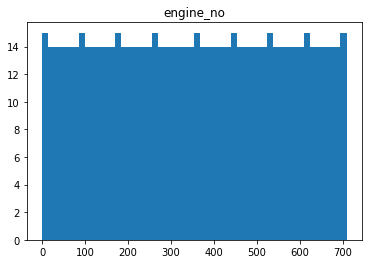

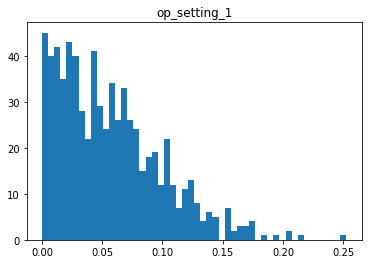

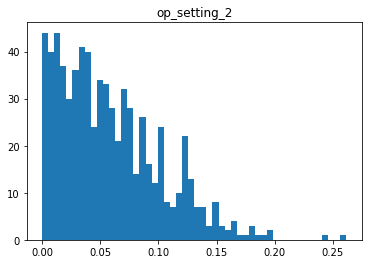

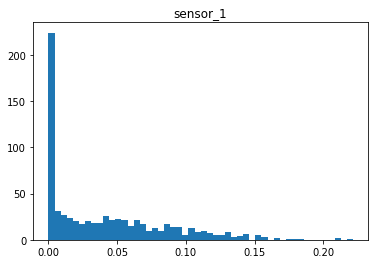

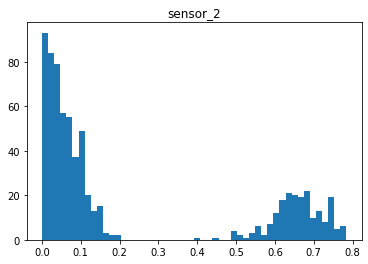

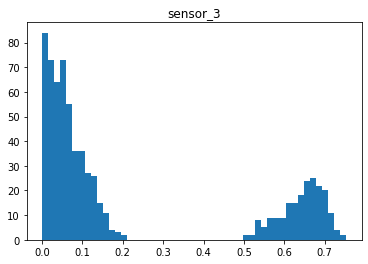

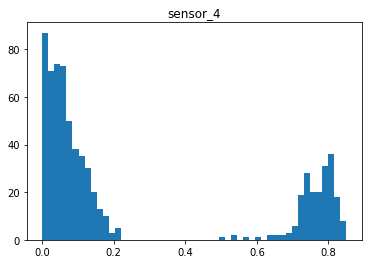

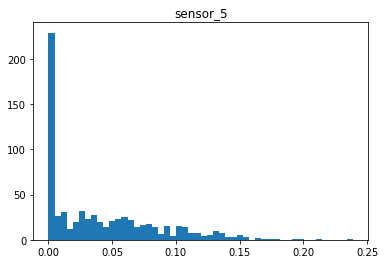

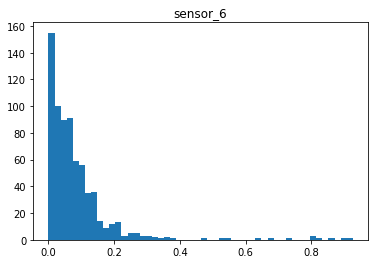

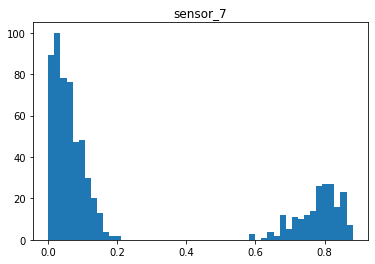

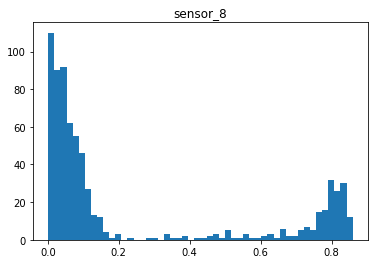

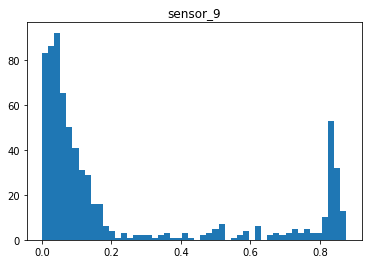

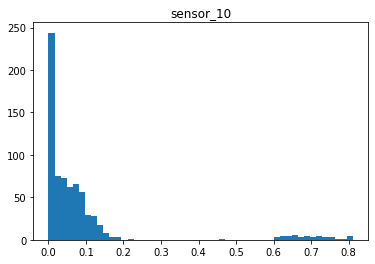

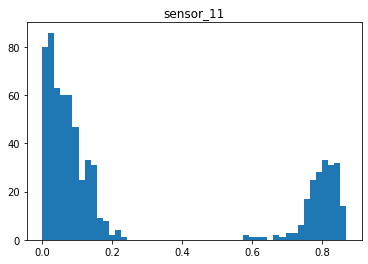

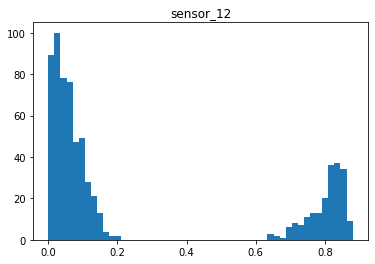

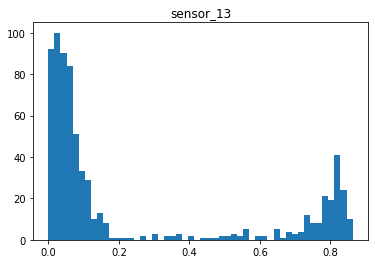

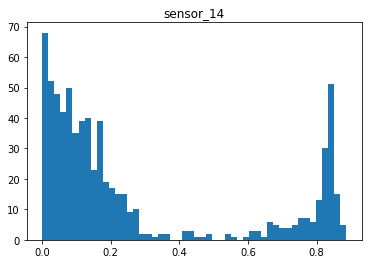

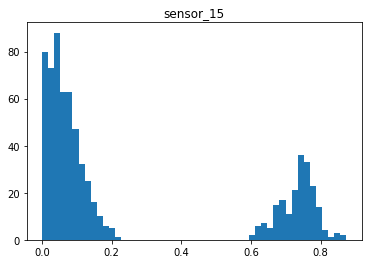

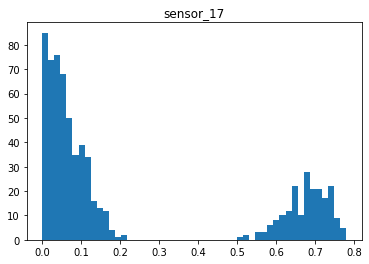

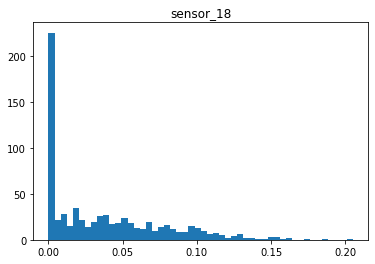

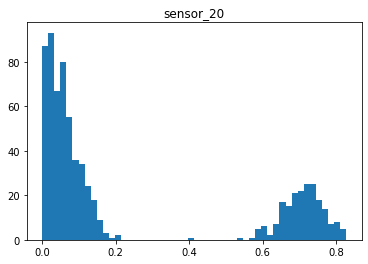

In [46]:
c = 'engine_no', 'op_setting_1', 'op_setting_2', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_18', 'sensor_20', 'sensor_21',
for i in range(22):
    plt.hist(np.abs(l[:, i]), bins=50)
    plt.title(c[i])
    plt.show()

In [48]:
df_cor = pd.DataFrame(l, columns=c)
df_cor=df_cor.dropna()
df_cor

engine_no  op_setting_1  op_setting_2  sensor_1  sensor_2  sensor_3  \
0          0.0      0.045065      0.045413 -0.037769 -0.033152 -0.009067   
1          1.0     -0.065542     -0.044593  0.047356  0.031300  0.053858   
2          2.0      0.049306      0.020897 -0.055194 -0.007445  0.041109   
3          3.0      0.000280      0.028717  0.001933 -0.046329 -0.040723   
4          4.0      0.094081      0.126296 -0.052070 -0.014375  0.018400   
5          5.0      0.032973     -0.107430  0.000000  0.609925  0.607981   
6          6.0      0.042669      0.056504 -0.062669 -0.057292 -0.030899   
7          7.0     -0.053664      0.121093  0.000000  0.608727  0.586368   
8          8.0      0.046310      0.006897 -0.041056 -0.014963  0.017264   
9          9.0     -0.052053     -0.118557  0.000000  0.532707  0.627690   
10        10.0     -0.129133     -0.130568  0.129507  0.112602  0.119368   
11        11.0      0.014420      0.016642 -0.017012 -0.010770  0.016283   
12        12.0      0.015175      0.040666 -0.010825  0.007146  0.031606   
13        13.0      0.095002      0.005654  0.000000  0.568765  0.638417   
14        14.0      0.042669      0.056504 -0.062669 -0.058135 -0.029925   
15        15.0      0.022579      0.030701 -0.012879 -0.015016  0.000099   
16        16.0     -0.020662      0.017783  0.000000  0.487184  0.695976   
17        17.0     -0.102498     -0.101796  0.125378  0.103548  0.100157   
18        18.0      0.066138      0.105739 -0.057034 -0.068538 -0.063094   
19        19.0      0.014467     -0.038672  0.000000  0.670845  0.610753   
20        20.0     -0.143326     -0.149040  0.106030  0.081620  0.084981   
21        21.0      0.074186     -0.099624  0.000000  0.658853  0.541782   
23        23.0     -0.010731      0.005409  0.010981  0.027572  0.047464   
24        24.0      0.129268      0.155826 -0.122036 -0.139928 -0.130847   
25        25.0     -0.001916      0.044961  0.000000  0.610963  0.640089   
26        26.0      0.044224      0.050598 -0.057904 -0.075859 -0.064454   
27        27.0      0.163526      0.115095 -0.175111 -0.156562 -0.119604   
28        28.0     -0.087944     -0.069462  0.115805  0.119547  0.134242   
29        29.0     -0.063231     -0.021277  0.065711  0.067437  0.086312   
30        30.0     -0.030068      0.016473  0.000000  0.697997  0.624484   
..         ...           ...           ...       ...       ...       ...   
678      678.0     -0.116569     -0.127130  0.114727  0.105995  0.114444   
679      679.0     -0.054751      0.059661  0.000000  0.676563  0.673815   
680      680.0     -0.156231     -0.042025  0.000000  0.623492  0.688998   
681      681.0      0.168325      0.117729 -0.142973 -0.092923 -0.046049   
682      682.0      0.017449      0.021519 -0.030143 -0.060549 -0.050204   
683      683.0      0.139371      0.020128  0.000000  0.621522  0.616161   
684      684.0      0.004676     -0.010024 -0.006282 -0.037508 -0.029798   
685      685.0     -0.029080      0.005942  0.031485  0.074849  0.117470   
686      686.0     -0.008778      0.004360 -0.007566 -0.018935  0.001515   
687      687.0     -0.106919     -0.090955  0.115001  0.088276  0.088431   
688      688.0     -0.007414     -0.010777  0.000000  0.742796  0.678277   
689      689.0     -0.081934     -0.092968  0.049789  0.004084  0.023271   
690      690.0      0.037393      0.030838 -0.028054 -0.015578  0.002287   
691      691.0      0.005854     -0.001803 -0.005359  0.012219  0.054079   
692      692.0      0.058058      0.013277 -0.069877 -0.071833 -0.039874   
693      693.0      0.047690      0.021065 -0.007280  0.041545  0.077588   
694      694.0      0.103937      0.075257 -0.129358 -0.113033 -0.077174   
695      695.0     -0.004322     -0.035998 -0.058613 -0.098331 -0.088212   
696      696.0      0.006987      0.023961  0.009366  0.035214  0.064259   
698      698.0     -0.101991     -0.095628  0.102484  0.096533  0.105827   
699      699.0     -0.025471      0.013992  0.022212 

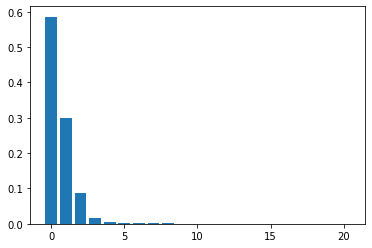

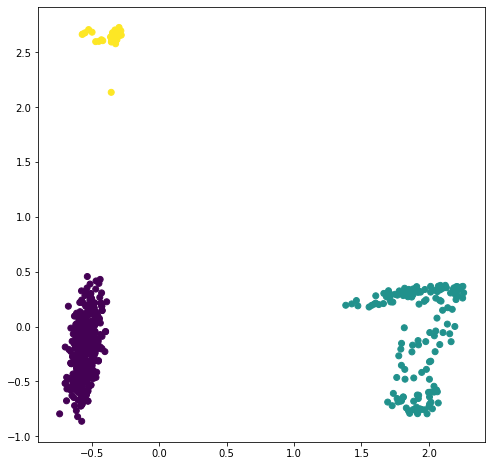

In [51]:
df = df_cor.drop(columns=['engine_no'])
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(df)

pca = PCA()
cor_pca = pca.fit_transform(df)

expl = pca.explained_variance_ratio_
plt.bar(range(len(expl)), expl)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(cor_pca[:,0], cor_pca[:,1], c=y_pred)

In [54]:
df_cor['Failure']=y_pred
fail_type=df_cor[['engine_no', 'Failure']]
pd.merge(X, fail_type, how='left', on='engine_no')

engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0               0               1      0.471650      0.570738 -0.765963   
1               0               2      1.076672      1.172198 -1.196595   
2               0               3      0.471523      0.574815 -0.765963   
3               0               4      1.500033      1.170567 -1.342550   
4               0               5      1.076515      1.168664 -1.196595   
5               0               6     -1.041347     -1.108892  1.079181   
6               0               7      1.499785      1.169752 -1.342550   
7               0               8      1.500033      1.168664 -1.342550   
8               0               9      1.499797      1.168664 -1.342550   
9               0              10     -0.435920     -0.434866  0.105492   
10              0              11     -1.041347     -1.114327  1.079181   
11              0              12      0.471626      0.570738 -0.765963   
12              0              13      1.076642      1.170023 -1.196595   
13              0              14     -0.436440     -0.433507  0.105492   
14              0              15      0.168582      0.792786  0.175840   
15              0              16      1.499809      1.168664 -1.342550   
16              0              17     -0.436404     -0.434594  0.105492   
17              0              18      1.076660      1.168664 -1.196595   
18              0              19     -1.041329     -1.111066  1.079181   
19              0              20      1.499773      1.168664 -1.342550   
20              0              21      1.499936      1.168664 -1.342550   
21              0              22     -0.436470     -0.434866  0.105492   
22              0              23      1.499870      1.170839 -1.342550   
23              0              24      1.076255      1.169752 -1.196595   
24              0              25      0.471142      0.572641 -0.765963   
25              0              26      0.471565      0.572641 -0.765963   
26              0              27      0.169109      0.793330  0.175840   
27              0              28     -0.436041     -0.434866  0.105492   
28              0              29     -1.041250     -1.110522  1.079181   
29              0              30      0.168740      0.791427  0.175840   
...           ...             ...           ...           ...       ...   
160329        708             134      1.076412      1.171382 -1.196595   
160330        708             135      1.076654      1.168664 -1.196595   
160331        708             136     -1.041305     -1.114327  1.079181   
160332        708             137      0.168939      0.793330  0.175840   
160333        708             138      1.076309      1.168664 -1.196595   
160334        708             139     -0.436391     -0.434866  0.105492   
160335        708             140      1.499985      1.168664 -1.342550   
160336        708             141      1.499773      1.173013 -1.342550   
160337        708             142      0.168824      0.793330  0.175840   
160338        708             143      0.169139      0.792786  0.175840   
160339        708             144      0.471208      0.570738 -0.765963   
160340        708             145     -0.436053     -0.433778  0.105492   
160341        708             146      1.500051      1.172469 -1.342550   
160342        708             147      0.471342      0.571825 -0.765963   
160343        708             148      1.500093      1.168664 -1.342550   
160344        708             149     -0.436258     -0.434866  0.105492   
160345        708             150      1.499833      1.169208 -1.342550   
160346        708             151      1.499688      1.168664 -1.342550   
160347        708             152     -1.041347     -1.114327  1.079181   
160348        708             153     -1.041365     -1.111338  1.079181   
160349        708             154     -1.041250     -1.114327  1.079181   
160350        708             155

In [61]:
dataset = []
for i, df in series.items():
    length = len(df)
    for s in range(100, length):
        dataset.append(df[:s])
        print(df[:s])
    print(pd.DataFrame(dataset))

    engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  sensor_2  \
0           0               1      0.471650      0.570738 -0.765963 -1.424744   
1           0               2      1.076672      1.172198 -1.196595 -0.986876   
2           0               3      0.471523      0.574815 -0.765963 -1.434632   
3           0               4      1.500033      1.170567 -1.342550 -1.128830   
4           0               5      1.076515      1.168664 -1.196595 -0.992290   
5           0               6     -1.041347     -1.108892  1.079181  1.059806   
6           0               7      1.499785      1.169752 -1.342550 -1.125299   
7           0               8      1.500033      1.168664 -1.342550 -1.129536   
8           0               9      1.499797      1.168664 -1.342550 -1.139424   
9           0              10     -0.435920     -0.434866  0.105492  0.167590   
10          0              11     -1.041347     -1.114327  1.079181  1.063102   
11          0              1

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[123 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

[127 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[139 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[231 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[262 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[275 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

[320 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
0            0               1      0.471650      0.570738 -0.765963   
1            0               2      1.076672      1.172198 -1.196595   
2            0               3      0.471523      0.574815 -0.765963   
3            0               4      1.500033      1.170567 -1.342550   
4            0               5      1.076515      1.168664 -1.196595   
5            0               6     -1.041347     -1.108892  1.079181   
6            0               7      1.499785      1.169752 -1.342550   
7            0               8      1.500033      1.168664 -1.342550   
8            0               9      1.499797      1.168664 -1.342550   
9            0              10     -0.435920     -0.434866  0.105492   
10           0              11     -1.041347     -1.114327  1.079181   
11           0              12      0.471626      0.570738 -0.765963   
12           0              13      1.076642      1.170023 -1.19

                                                     0
0        engine_no  time_in_cycles  op_setting_1  o...
1         engine_no  time_in_cycles  op_setting_1  ...
2         engine_no  time_in_cycles  op_setting_1  ...
3         engine_no  time_in_cycles  op_setting_1  ...
4         engine_no  time_in_cycles  op_setting_1  ...
5         engine_no  time_in_cycles  op_setting_1  ...
6         engine_no  time_in_cycles  op_setting_1  ...
7         engine_no  time_in_cycles  op_setting_1  ...
8         engine_no  time_in_cycles  op_setting_1  ...
9         engine_no  time_in_cycles  op_setting_1  ...
10        engine_no  time_in_cycles  op_setting_1  ...
11        engine_no  time_in_cycles  op_setting_1  ...
12        engine_no  time_in_cycles  op_setting_1  ...
13        engine_no  time_in_cycles  op_setting_1  ...
14        engine_no  time_in_cycles  op_setting_1  ...
15        engine_no  time_in_cycles  op_setting_1  ...
16        engine_no  time_in_cycles  op_setting_1  ...
17        

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

[177 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.04

[182 rows x 24 columns]
     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.04

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

     engine_no  time_in_cycles  op_setting_1  op_setting_2  sensor_1  \
340          1               1      0.168964      0.788166  0.175840   
341          1               2     -1.041281     -1.114327  1.079181   
342          1               3      0.169000      0.788166  0.175840   
343          1               4      0.169060      0.788166  0.175840   
344          1               5     -0.436077     -0.434866  0.105492   
345          1               6      1.499972      1.171926 -1.342550   
346          1               7     -0.436246     -0.430245  0.105492   
347          1               8      1.500136      1.168664 -1.342550   
348          1               9      1.076237      1.168664 -1.196595   
349          1              10      1.076400      1.172469 -1.196595   
350          1              11      1.499839      1.168664 -1.342550   
351          1              12     -0.436379     -0.431876  0.105492   
352          1              13     -1.041329     -1.114327  1.07

KeyboardInterrupt: 